<a href="https://colab.research.google.com/github/AbinayaSri76/MLnow_2.0/blob/main/03_LinearRegression/3a_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Univariate Linear Regression

[Link to Download the dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

**Data Created** : June 6, 2021

Author : [Abinaya Sri](https://github.com/AbinayaSri76)

Reach out: [Email](abinaya.sri2020@vitstudent.ac.in) | [Github](https://github.com/AbinayaSri76) | [LinkedIn](https://www.linkedin.com/in/a-abinaya-sri-867064202/)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/Student'

/content/drive/MyDrive/Student


In [3]:
ls

cleanedMathData.csv  student-merge.R  student.txt
student-mat.csv      student-por.csv


In [4]:
import os

In [5]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [6]:
mathData = pd.read_csv('student-mat.csv', sep=';') #load the csv file as dataframe

In [7]:
mathData.head(10) #print the first ten rows of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


We are just going to consider the columns G1 and G3 for univariate linear regression

$G3_i = G1_i  \cdot \theta_1 + \theta_0$

In [8]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [9]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [10]:
ls

cleanedMathData.csv  student-merge.R  student.txt
student-mat.csv      student-por.csv  univariate_MathData_2.csv


##Data visualization

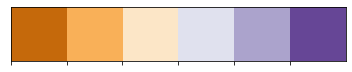

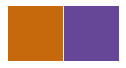

In [11]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [12]:
uniMathData.columns #columns in the dataframe

Index(['G1', 'G3'], dtype='object')

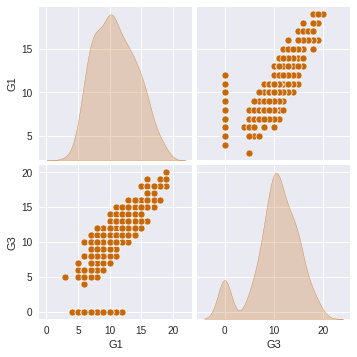

In [13]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

##Data Splits

In [14]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [15]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [16]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [17]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [18]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [19]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [20]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [21]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 1s 17ms/step - loss: 2.0341 - mae: 2.0341 - mse: 8.3985 - val_loss: 1.6391 - val_mae: 1.6391 - val_mse: 6.1016
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 1.9981 - mae: 1.9981 - mse: 8.3081 - val_loss: 1.6182 - val_mae: 1.6182 - val_mse: 6.0361
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 1.9717 - mae: 1.9717 - mse: 8.2349 - val_loss: 1.6122 - val_mae: 1.6122 - val_mse: 6.0000
Epoch 4/300
10/10 [==============================] - 0s 3ms/step - loss: 1.9523 - mae: 1.9523 - mse: 8.1907 - val_loss: 1.6092 - val_mae: 1.6092 - val_mse: 5.9791
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 1.9334 - mae: 1.9334 - mse: 8.1770 - val_loss: 1.6060 - val_mae: 1.6060 - val_mse: 5.9757
Epoch 6/300
10/10 [==============================] - 0s 3ms/step - loss: 1.9114 - mae: 1.9114 - mse: 8.1679 - val_loss: 1.6029 - val_mae: 1.6029 - val_mse: 5.9909
Epoch 7/300
10/10 [==

In [22]:
print(history)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


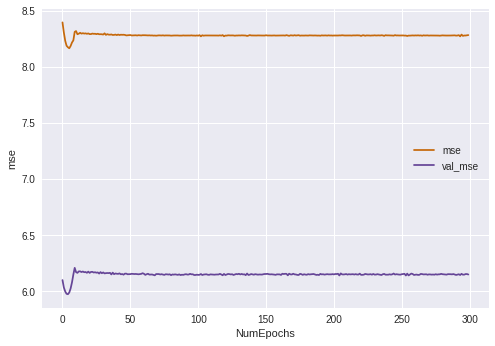

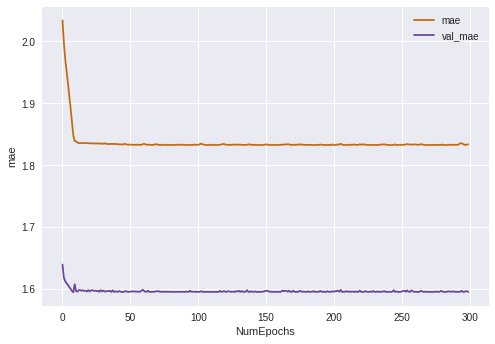

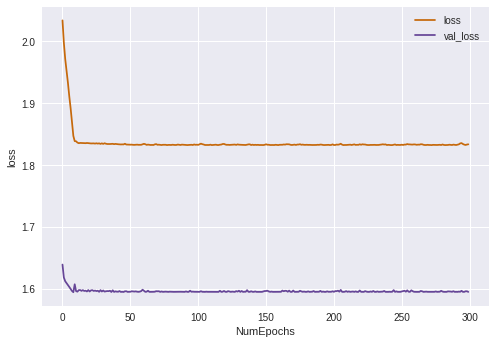

In [24]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [25]:
model.predict([1])

array([[1.0016896]], dtype=float32)

In [26]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[1.0016896]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[1.0016896]
 [2.0014162]
 [3.0011427]
 [4.0008693]
 [5.0005956]]

List of Predictions (flattened out):
[1.0016896 2.0014162 3.0011427 4.0008693 5.0005956]



In [27]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [28]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [29]:
print(len(testPreds))
print(testPreds)

79
[13.998135   6.0003223 10.998955  16.997314  16.997314  11.998681
 13.998135  18.996767  18.996767   7.9997754 13.998135  12.998407
  7.9997754  7.000049   8.999501  12.998407  10.998955  15.997587
  7.000049   9.999228  14.997861  12.998407  13.998135  15.997587
  7.000049   7.000049   7.9997754  9.999228  11.998681   9.999228
 11.998681  12.998407   9.999228   6.0003223  8.999501  11.998681
  7.000049   7.9997754 13.998135   8.999501   8.999501   7.000049
 11.998681   6.0003223 12.998407   7.000049   7.000049  10.998955
 12.998407  16.997314  11.998681  14.997861   8.999501  11.998681
 14.997861  11.998681  14.997861  11.998681  14.997861  10.998955
 11.998681   7.9997754 15.997587   7.000049  15.997587  10.998955
 15.997587  12.998407   7.9997754  7.9997754 11.998681  17.99704
 12.998407  15.997587   9.999228   7.000049   9.999228   7.000049
 10.998955 ]


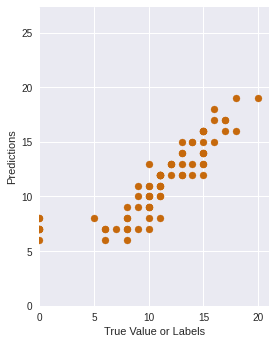

In [30]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

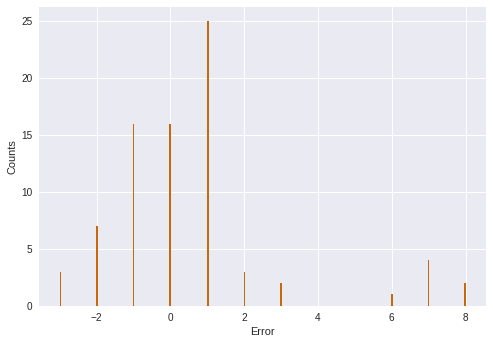

In [31]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

Note:

Validation loss val_loss is a metric that tells you how much deviation from the actual label can you expect in the predicted label

To optimize your predicitons -->

* Hyperparameter tuning --> numEpochs, optimizer, learning_rate, lossFunctions